In [136]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import random

In [ ]:
# Reference: https://docs.pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [137]:
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

In [138]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
    )

batch_size = 8

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

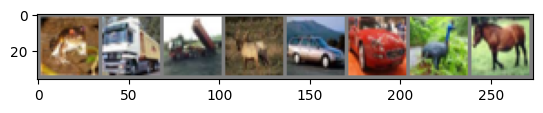

frog  truck truck deer  car   car   bird  horse


In [139]:
import matplotlib.pyplot as plt
import numpy as np
import random

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

# remember or copy the labels...

In [140]:
# 3 input channels, 32 output channels, so build 32 different 3x3x3 filters
# 32x32 output map
# 

In [141]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv_block1 = nn.Sequential( # input: 3(rgb)*32*32 image
            nn.Conv2d(3, 32, 3, padding=1), # (batch), in-channels, out-channels, kernel size, 1 pxl on each side
            # Each of 32 3x3x3 filter computes a scalar. We slide this 3x3x3 filter over (32+2)x(32+2) inputs;
            # hence you get 32x32 scalars. Now iterate over all the rest of fiters you have.
            # 3x3x3 (width*height*rgb depth) filters, so you get 32x32x32 scalars.
            nn.BatchNorm2d(32), # for all 32 channels, normalize.
            nn.ReLU(),
            nn.Conv2d(32, 32, 3, padding=1), # input channel, output channel, 3x3 kernel
            nn.ReLU(),
            nn.MaxPool2d(2) # only look at the largest activation in each 2x2 window
        )

        self.conv_block2 = nn.Sequential(
            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.fc = nn.Sequential(
            nn.Linear(64 * 8 * 8, 256), # 64 channels, 8x8 activations (due to two maxpools)
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=5e-4)

In [142]:
losses = []
for epoch in range(5):  # loop over the dataset multiple times. For the sake of time, we only do 5 epochs. More is usually needed.
    running_loss = 0.0
    batch_count = 0

    for i, data in enumerate(trainloader):
        inputs, labels = data

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        batch_count += 1

        if batch_count == 100:
            avg_loss = running_loss / batch_count
            print(f'[{epoch+1}, {i+1}] loss: {avg_loss:.4f}')
            losses.append(avg_loss)

            running_loss = 0.0
            batch_count = 0


print('Finished Training')

[1, 100] loss: 2.2569
[1, 200] loss: 2.0369
[1, 300] loss: 1.9576
[1, 400] loss: 1.8906
[1, 500] loss: 1.8315
[1, 600] loss: 1.7833
[1, 700] loss: 1.8244
[1, 800] loss: 1.7554
[1, 900] loss: 1.7034
[1, 1000] loss: 1.7259
[1, 1100] loss: 1.6336
[1, 1200] loss: 1.7061
[1, 1300] loss: 1.6622
[1, 1400] loss: 1.6645
[1, 1500] loss: 1.5529
[1, 1600] loss: 1.6061
[1, 1700] loss: 1.6310
[1, 1800] loss: 1.6120
[1, 1900] loss: 1.6232
[1, 2000] loss: 1.6060
[1, 2100] loss: 1.5477
[1, 2200] loss: 1.5405
[1, 2300] loss: 1.5451
[1, 2400] loss: 1.4949
[1, 2500] loss: 1.4994
[1, 2600] loss: 1.5471
[1, 2700] loss: 1.4627
[1, 2800] loss: 1.4662
[1, 2900] loss: 1.4853
[1, 3000] loss: 1.4299
[1, 3100] loss: 1.4563
[1, 3200] loss: 1.4098
[1, 3300] loss: 1.4324
[1, 3400] loss: 1.4260
[1, 3500] loss: 1.4353
[1, 3600] loss: 1.4255
[1, 3700] loss: 1.4135
[1, 3800] loss: 1.3722
[1, 3900] loss: 1.3940
[1, 4000] loss: 1.3415
[1, 4100] loss: 1.4968
[1, 4200] loss: 1.4810
[1, 4300] loss: 1.3454
[1, 4400] loss: 1.41

310


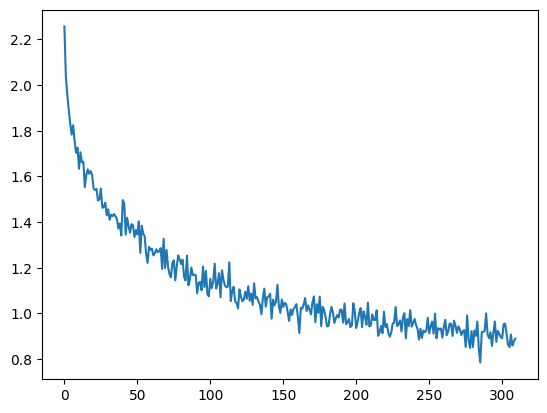

In [143]:
print(len(losses))
plt.plot(np.arange(0, len(losses)), losses)

In [144]:
PATH = './cnn.pth'
torch.save(net.state_dict(), PATH)

In [145]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

# Reminder: frog, truck, truck, deer, car, car, bird, horse
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(8)))

# almost perfect?

Predicted:  cat   truck truck deer  car   car   deer  horse


In [146]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

# looks not very good? which category did we miss the most?

Accuracy of the network on the 10000 test images: 67 %


In [147]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
    
# animals are hard!

Accuracy for class: plane is 62.5 %
Accuracy for class: car   is 79.8 %
Accuracy for class: bird  is 40.2 %
Accuracy for class: cat   is 50.8 %
Accuracy for class: deer  is 62.6 %
Accuracy for class: dog   is 50.6 %
Accuracy for class: frog  is 73.9 %
Accuracy for class: horse is 82.7 %
Accuracy for class: ship  is 85.4 %
Accuracy for class: truck is 80.5 %
